## TF Dataset

In [18]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /DIV2K_train_HR

/content/drive/.shortcut-targets-by-id/861/DIV2K_train_HR


In [17]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Moscow DS/content/MSCOCO_TRAIN2017_RESIZED

/content/drive/MyDrive/PMDL/PMDL Project /Moscow DS/content/MSCOCO_TRAIN2017_RESIZED


In [18]:
import os

In [19]:
tr_files=os.listdir(".")

In [20]:
len(tr_files)

15628

In [21]:
pd="/content/drive/MyDrive/PMDL/PMDL Project /DIV2K_train_HR"
val_files=os.listdir(pd)
for i in range(len(val_files)):
  val_files[i]=os.path.join(pd,val_files[i])

In [22]:
len(val_files)

4315

In [23]:
def load_image_y(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (128, 128))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [24]:
def load_image_x(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (64, 64))
    #img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [25]:
def img_data(img_paths,size):
  data=tf.data.Dataset.from_tensor_slices(img_paths)
  data=data.map(tf.io.read_file)
  data=data.map(lambda x: tf.image.decode_jpeg(x,channels=3),num_parallel_calls=AUTOTUNE)
  data = data.map(lambda x: tf.image.resize(x, (size, size)))

  return data


In [26]:
def y_imgs(y_img_files):
  y_ds=img_data(y_img_files,128)
  #y_ds=y_ds.map(lambda x: x/255.0)
  return y_ds

In [27]:
def x_imgs(x_img_files):
  x_ds=img_data(x_img_files,64)
  #x_ds=x_ds.map(lambda x: x/255.0)

  return x_ds

In [28]:
tf.config.run_functions_eagerly(True)

def dataset(x_files,y_files,batch_size=32,repeat_count=None):
  x_data=x_imgs(x_files)
  y_data=y_imgs(y_files)
  data=tf.data.Dataset.zip((x_data,y_data))
  data=data.batch(batch_size)
  data=data.repeat(repeat_count)
  data=data.prefetch(buffer_size=AUTOTUNE)
  return data

In [29]:
# get files
from tensorflow.python.data.experimental import AUTOTUNE


## Train with TF DS

In [ ]:
n_epochs=50
batch_size=16
n_batches=len(tr_files)//batch_size

In [31]:
training_data=dataset(tr_files,tr_files,batch_size=batch_size)
val_data=dataset(val_files,val_files,batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [32]:
import numpy as np
import tqdm

In [28]:
edsr=k.models.load_model("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams2.h5")

In [83]:
ckpt = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_contentloss_div2konly_nomalized0-1.h5")

In [161]:
edsr.load_weights("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EEDSR_contentloss_div2konly_wtsonly-nomalized0-1.h5")

In [ ]:
H=edsr.fit(training_data,epochs=n_epochs,batch_size=batch_size,steps_per_epoch=n_batches) #callbacks=[ckpt]

In [50]:
import matplotlib.pyplot as plt

In [ ]:
k.backend.clear_session()

In [ ]:
yp[0]

In [14]:
# EDQE
edqe.summary()

Model: "EDQE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
_______________________________________________________________________________________________

In [51]:
#k.models.save_model(edqe,"/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDQE_V1.h5")

In [52]:
ckpt = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDQE.h5")

In [ ]:
H2=edqe.fit(training_data,epochs=n_epochs,batch_size=batch_size,steps_per_epoch=n_batches,callbacks=[ckpt]) 

In [33]:
ckpt2 = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDQE-bigds.h5")

In [ ]:
H2=edqe.fit(training_data,epochs=n_epochs,batch_size=batch_size,steps_per_epoch=n_batches,validation_data=val_data,validation_steps=1,callbacks=[ckpt2]) 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(H2.history['loss'][1:])

plt.plot(H2.history['val_loss'])

TensorShape([64, 128, 128, 3])

## Predict with TF DS

In [39]:
x,y=next(iter(training_data))

In [ ]:
x[0]

In [81]:
yp=edqe.predict(x)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [ ]:
yp[1]

In [24]:
import matplotlib.pyplot as plt


In [ ]:
plt.imshow(tf.cast(x[0],tf.int32))

In [ ]:
plt.imshow(tf.cast(yp[0],tf.int32))

In [ ]:
plt.imshow(tf.cast(y[13],tf.int32))

### Test Whole model

In [56]:
from skimage.io import imread
import numpy as np

In [61]:
g=imread("/content/grey1.jpg").astype(np.float32)
c=imread("/content/colored5.JPG").astype(np.float32)

In [58]:
pr=edqe.predict(c.reshape(-1,c.shape[0],c.shape[1],c.shape[2]))
pr2 = edqe.predict(pr.reshape(-1,c.shape[0],c.shape[1],c.shape[2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


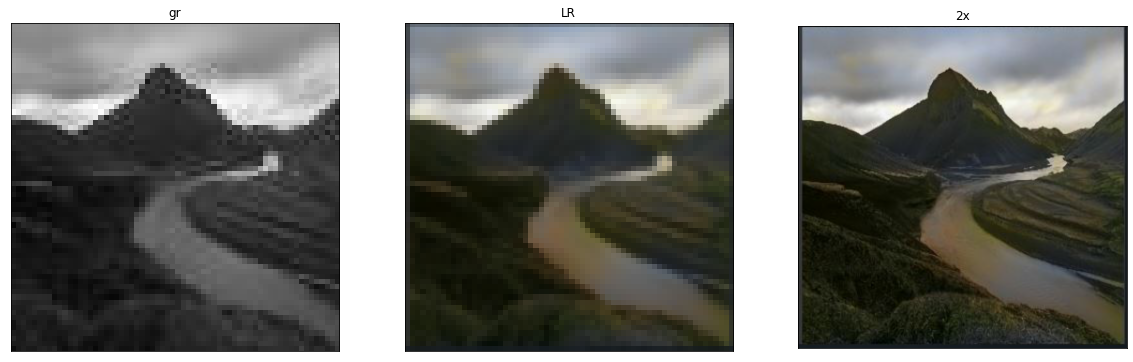

In [64]:
plot_sample_gr(g,c2,pr.reshape(pr2.shape[1:]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


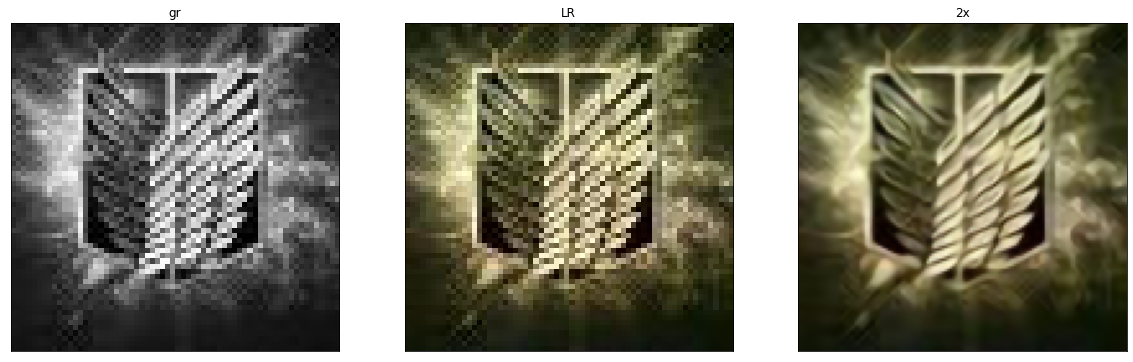

In [44]:
plot_sample_gr(g,c,pr.reshape(pr2.shape[1:]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


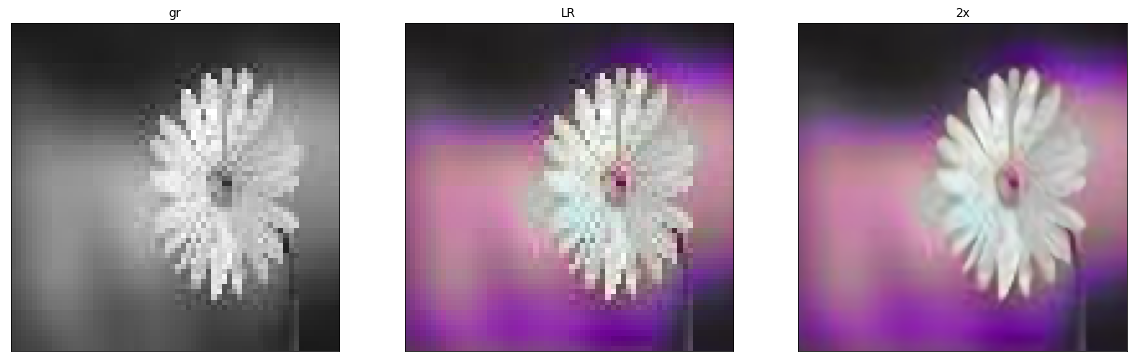

In [49]:
plot_sample_gr(g,c,pr.reshape(pr2.shape[1:]))


In [ ]:
plot_sample_gr(g,c,pr.reshape(pr2.shape[1:]))


### Test SuperRes

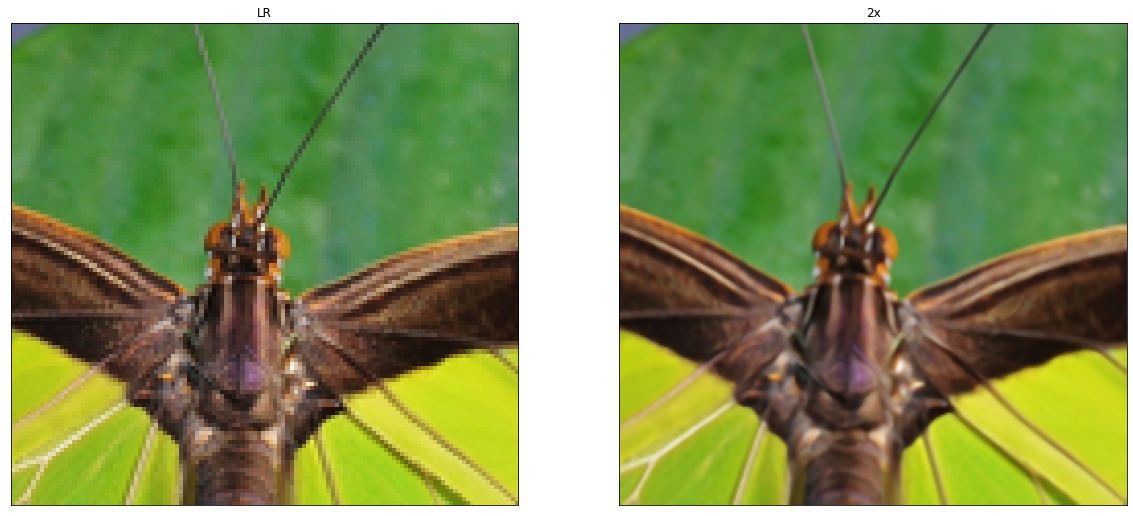

In [76]:
plot_sample(c,pr.reshape(pr.shape[1:]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


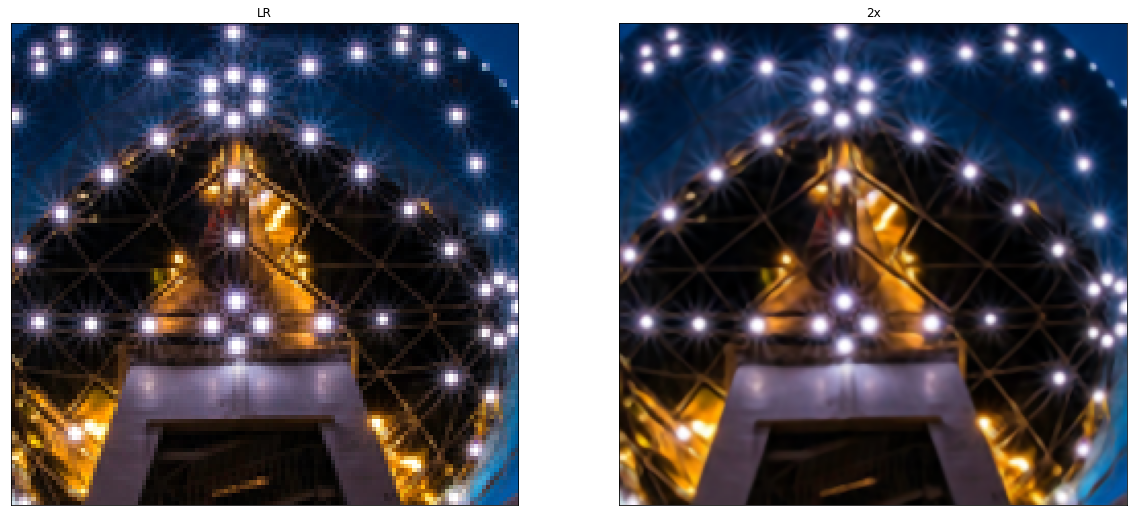

In [69]:
plot_sample(c,pr.reshape(pr.shape[1:]))

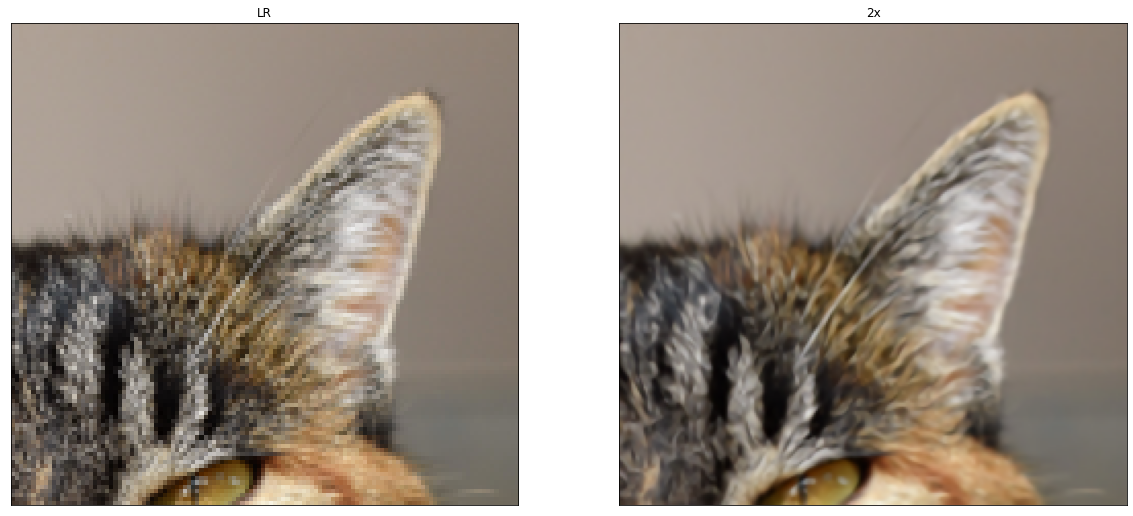

In [66]:
plot_sample(c,pr.reshape(pr.shape[1:]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


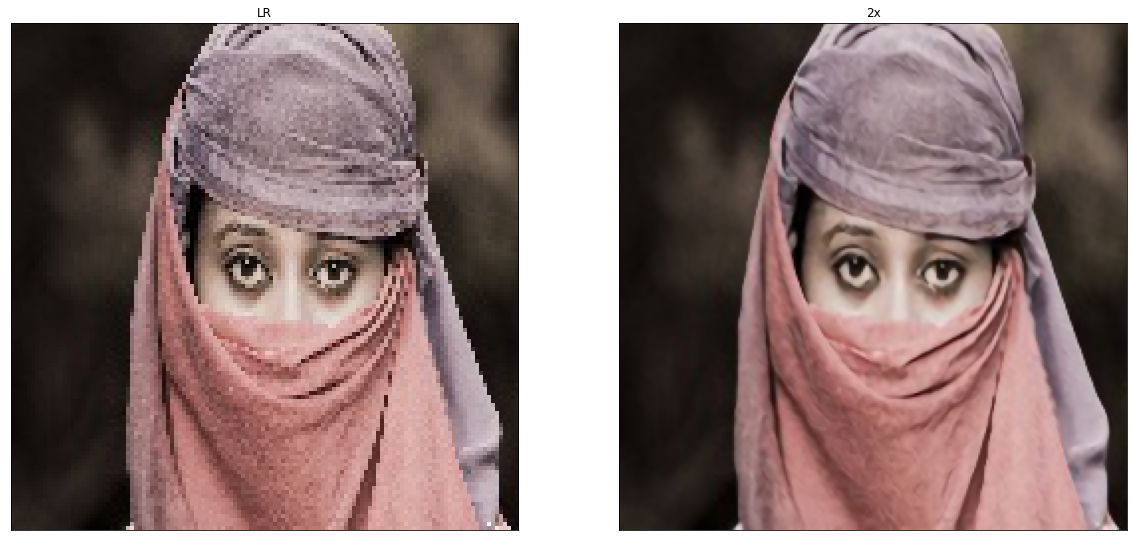

In [63]:
plot_sample(c,pr.reshape(pr.shape[1:]))

In [35]:
def plot_sample_gr(gr, lr, sr):
    plt.figure(figsize=(20, 10))

    images = [gr,lr, sr]
    titles = ['gr','LR', '2x']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i+1)
        plt.imshow(tf.cast(img,tf.int32))
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

In [33]:

def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
    titles = ['LR', '2x']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(tf.cast(img,tf.int32))
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

## ImageGenerator

In [ ]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Flowers photos

/content/drive/MyDrive/PMDL/PMDL Project /Flowers photos


In [ ]:
from skimage.io import imread
from skimage.transform import rescale, resize
import numpy as np
import pandas as pd
import os

In [ ]:
def x_img(path):
  return imread(path)



In [ ]:

def y_img( path ):
  return imread(path)

In [ ]:
def preprocess_x(img):
  img=resize(img,(75,75))
  img=np.array(img).astype(np.float32)

  return img

In [ ]:
def preprocess_y(img):
  img=resize(img,(150,150))
  img=np.array(img).astype(np.float32)
  return img

In [ ]:
def data_generator(files_x,files_y, batch_size = 64):
    
    while True:
          # Select files (paths/indices) for the batch
          files_x=np.asarray(files_x)
          files_y=np.asarray(files_y)

          inds=np.random.randint(0,len(files_x),size=batch_size)

          x_batch_paths=files_x[inds]
          y_bathc_paths=files_y[inds]
          #batch_paths  = np.random.choice(a    = files_x, 
           #                               size = batch_size)
          batch_input  = []
          batch_output = [] 
          
          # Read in each input, perform preprocessing and get labels
          for path in x_batch_paths:
              x_im=x_img(path )
              y_im = y_img(path)
            
              x = preprocess_x(x_im)
              y = preprocess_y(y_im)

              batch_input += [ x ]
              batch_output += [ y ]
          # Return a tuple of (input, output) to feed the network
          batch_x = np.array( batch_input )
          batch_y = np.array( batch_output )
        
          yield( batch_x, batch_y )

## EDQE

In [53]:
import numpy as np
DIV2K_RGB_MEAN = np.array([0.4488, 0.4371, 0.4040]) *255

edsr=k.models.load_model("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_PaperParams2.h5")

In [21]:
def scale(x):
  edsr.trainable=False
  return edsr(x)

In [22]:
def EDQE(n_filters=64,num_resblocks=24):
  xin=ly.Input(shape=(None,None,3))
  x=ly.Lambda(scale)(xin)
  x=ly.Conv2D(n_filters,3,padding='same')(x)
  x=x_res=ly.Conv2D(n_filters,3,padding='same')(x)
  for i in range(num_resblocks):
    x_res=res_block(x_res)
  
  x_res=ly.Conv2D(n_filters,3,padding='same')(x_res)
  x=ly.Add()([x_res,x])

  x=ly.Conv2D(n_filters,3,padding='same')(x)
  #upsample layer
  #x = ly.Conv2D(n_filters * (scale ** 2), 3, padding='same')(x)
  #x= ly.Lambda(lambda t: tf.nn.depth_to_space(t,scale))(x)

  x=ly.Conv2D(64,3,padding='same')(x)
  x=ly.Conv2D(64,3,padding='same')(x)

  x=ly.Conv2D(3,3,padding='same')(x)


  return k.Model(xin,x,name='EDQE')




In [ ]:
edqe=EDQE();


In [13]:
mae=k.losses.MeanAbsoluteError()
def vgg_loss(y_true,y_pred):
  y_tr_new=preprocess_input(y_true)

  y_pred_new=preprocess_input(y_pred)
  squared_difference = tf.square(vgg_model(y_tr_new) - vgg_model(y_pred_new))
  return tf.reduce_mean(squared_difference) +mae(y_true,y_pred)



In [54]:
lr_schedule = k.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=2*100000,
    decay_rate=0.5)

In [48]:
edqe.compile(loss=k.losses.MeanAbsoluteError(),optimizer=k.optimizers.Adam(learning_rate=lr_schedule))

In [ ]:
edqe=k.models.load_model( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDQE.h5")

##EDSR Resnet Code

In [51]:
import tensorflow as tf


In [52]:
k=tf.keras
ly=k.layers

In [17]:
# imagnet mean and STD
mean = [0.485, 0.456, 0.406]    # rgb 
std = [0.229, 0.224, 0.225]


In [18]:
def normalize(x):

  image_mean = tf.constant(mean, dtype=tf.float32) 
  image_std = tf.constant(std, dtype=tf.float32) 
  x = (x - image_mean) / image_std 
  return x

def denormalize(x):
  image_mean = tf.constant(mean, dtype=tf.float32) 
  image_std = tf.constant(std, dtype=tf.float32) 
  x =x*image_std+image_mean
  return x

In [19]:
def res_block(xin,scale=1,n_filters=64):
  
  x=ly.Conv2D(n_filters,3,activation='relu',padding='same')(xin)
  x=ly.Conv2D(n_filters,3,padding='same')(x)
  x=ly.Conv2D(n_filters,3,padding='same')(x)

  out=ly.Add()([xin,x])
  return out

In [6]:
def EDSR(n_filters=64,num_resblocks=24,scale=2):
  xin=ly.Input(shape=(None,None,3))
  x=ly.Lambda(normalize)(xin)
  x=ly.Conv2D(n_filters,3,padding='same')(x)
  x=x_res=ly.Conv2D(n_filters,3,padding='same')(x)
  for i in range(num_resblocks):
    x_res=res_block(x_res)
  
  x_res=ly.Conv2D(n_filters,3,padding='same')(x_res)
  x=ly.Add()([x_res,x])

  x=ly.Conv2D(n_filters,3,padding='same')(x)
  #upsample layer
  x = ly.Conv2D(n_filters * (scale ** 2), 3, padding='same')(x)
  x= ly.Lambda(lambda t: tf.nn.depth_to_space(t,scale))(x)

  x=ly.Conv2D(64,3,padding='same')(x)
  x=ly.Conv2D(64,3,padding='same')(x)

  x=ly.Conv2D(3,3,padding='same')(x)

  x=ly.Lambda(denormalize)(x)

  return k.Model(xin,x,name='EDSR')






In [7]:
from tensorflow.python.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input


In [8]:
vgg = VGG19(input_shape=(None, None, 3), include_top=False)
vgg_model=k.models.Model(vgg.input, vgg.layers[5].output)

80142336/80134624 [==============================] - 1s 0us/step


In [9]:
mae=k.losses.MeanAbsoluteError()
def vgg_loss(y_true,y_pred):
  y_tr_new=preprocess_input(y_true)

  y_pred_new=preprocess_input(y_pred)
  squared_difference = tf.square(vgg_model(y_tr_new) - vgg_model(y_pred_new))
  return tf.reduce_mean(squared_difference) +mae(y_true,y_pred)



In [176]:
edsr=EDSR()

In [71]:
edsr.summary()

Model: "EDSR"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_213 (Conv2D)             (None, None, None, 6 1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_214 (Conv2D)             (None, None, None, 6 36928       conv2d_213[0][0]                 
__________________________________________________________________________________________________
conv2d_215 (Conv2D)             (None, None, None, 6 36928       conv2d_214[0][0]                 
_______________________________________________________________________________________________

In [ ]:
%cd /content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized

/content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized


In [ ]:
import os

In [ ]:
new_dir="/content/drive/MyDrive/PMDL/PMDL Project /Resized Imgs/content/Images_resized"
file_paths=os.listdir(new_dir)

In [ ]:
list(reversed(sorted(file_paths)))

In [ ]:
os.remove("/content/drive/MyDrive/PMDL/PMDL Project /DIV2K_train_HR/EDSR_flowers_deep2.h5")

In [ ]:
data_gen=data_generator(file_paths,file_paths,64)

In [ ]:
# comppile

In [11]:
lr_schedule = k.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=2*100000,
    decay_rate=0.5)

In [178]:
edsr.compile(loss=vgg_loss,optimizer=k.optimizers.Adam(learning_rate=lr_schedule))

In [ ]:
ckpt = k.callbacks.ModelCheckpoint( "/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep2_tfds.h5")

In [ ]:
edsr.load_weights("")

In [ ]:
edsr.fit_generator(data_gen,steps_per_epoch=4315//16,epochs=100,callbacks=[ckpt])

In [ ]:
x=next(data_gen)

In [ ]:
x[0]

In [ ]:
k.models.save_model(edsr,"EDSR_flowers_deep.h5")

In [ ]:
edsr=k.models.load_model("/content/drive/MyDrive/PMDL/PMDL Project /Saved model/EDSR_flowers_deep_imgnetmean.h5")

## Prediction

In [ ]:
x=next(gen)

In [ ]:
y=edsr.predict(x)

In [ ]:
ys=y[5]
ys[y[5]<0]=0

In [ ]:
ys*255

array([[[46.011063 , 26.580189 , 23.729256 ],
        [18.838463 ,  3.9468787,  8.728671 ],
        [ 0.       , 10.695027 , 19.501717 ],
        ...,
        [ 8.881507 , 11.042147 ,  0.       ],
        [19.378216 ,  4.68337  , 13.679167 ],
        [50.159367 , 28.036621 , 32.814987 ]],

       [[18.142012 ,  8.906753 , 21.85569  ],
        [ 9.537899 , 11.013914 , 19.803473 ],
        [ 4.8759665,  4.8202767,  0.       ],
        ...,
        [ 0.       ,  4.100284 ,  0.       ],
        [16.689722 , 22.901766 ,  0.       ],
        [22.955109 , 10.433412 , 12.289133 ]],

       [[ 3.2938762,  9.065698 ,  4.8871684],
        [ 7.0668607,  5.0324955,  2.8064685],
        [ 0.       ,  0.       , 12.270902 ],
        ...,
        [ 4.9890413,  1.4304333,  0.       ],
        [15.07433  ,  3.9488392, 15.878428 ],
        [24.335512 ,  4.3738236,  7.2067842]],

       ...,

       [[ 1.7387639,  0.       ,  4.895946 ],
        [ 6.963111 ,  6.488403 ,  2.7603087],
        [14.119959 ,  

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(ys,vmax=255,vmin=0)

In [ ]:
plt.imshow(x[1][14])

In [ ]:
x=imread("/content/drive/MyDrive/PMDL/PMDL Project /seg_train/forest/10030.jpg")

In [ ]:
x=x.astype(np.float32)

In [ ]:
x

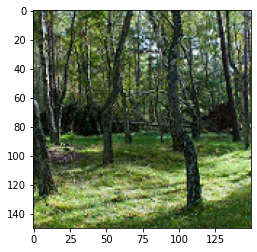

In [ ]:
plt.imshow(x)

In [ ]:
x.shape

(150, 150, 3)

In [ ]:
y_s=generator.predict(tf.reshape(xs,(1,472,496,3)))

In [ ]:
xs=resolve_single(generator,x)

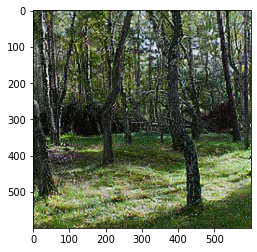

In [ ]:
plt.imshow(xs.numpy())

In [ ]:
y_s

In [ ]:
cd interl\ images

/content/drive/MyDrive/PMDL/PMDL Project /interl images
